# State fitting

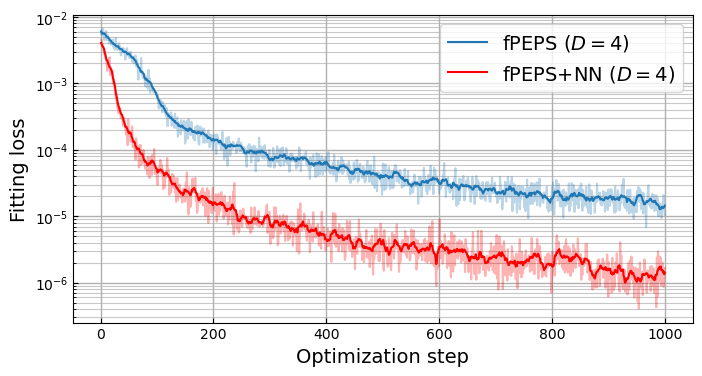

In [131]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter
import json
# read loss history from 'runs/exp3/exp3.json' and exp4.json, then plot them
pwd = '/home/sdu2/VMC/data'
loss_history_exp3 = json.load(open(pwd+"/SWO/fTN_Dt=8_chit=-1_fTN_D=4_chi=-1.json", "r"))
loss_history_exp4 = json.load(open(pwd+"/SWO/fTN_Dt=8_chit=-1_fTN_backflow_attn_Tensorwise_v1_D=4_chi=-1.json", "r"))

# data sturcture (time, step, loss), get step-loss curve
step_exp3 = [i[1] for i in loss_history_exp3]
loss_exp3 = [i[2] for i in loss_history_exp3]
step_exp4 = [i[1] for i in loss_history_exp4]
loss_exp4 = [i[2] for i in loss_history_exp4]

fig, ax = plt.subplots(figsize=(8, 4))
# smooth the loss curve
def smooth_loss(loss, window_size=10):
    smoothed_loss = []
    for i in range(len(loss)):
        i_left = max(0, i - window_size//2)
        i_right = min(len(loss), i + window_size//2)
        smoothed_loss.append(sum(loss[i_left:i_right]) / (i_right - i_left))
    return smoothed_loss
smooth_loss_exp3 = smooth_loss(loss_exp3)
smooth_loss_exp4 = smooth_loss(loss_exp4)
ax.plot(step_exp3, smooth_loss_exp3, label=r'fPEPS $(D=4)$', color='tab:blue')
ax.plot(step_exp4, smooth_loss_exp4, label=r'fPEPS+NN $(D=4)$', color='red')

# original loss curve background
ax.plot(step_exp3, loss_exp3, alpha=0.3, color='tab:blue')
ax.plot(step_exp4, loss_exp4, alpha=0.3, color='red')
ax.set_yscale('log')
ax.set_xlabel('Optimization step', fontsize=14)
ax.set_ylabel(r'Fitting loss', fontsize=14)
ax.legend(fontsize=14)
# 4) draw major and minor grids
ax.grid(which='major', linestyle='-', linewidth=1)
ax.grid(which='minor', linestyle='-', linewidth=0.8, alpha=0.7)
# 5) set major and minor ticks to point inwards

ax.tick_params(axis='both', direction='in', which='both', labelsize=10)  # Inset plot
plt.savefig(pwd+'/SWO/draft_fitting_curve_Dt=8.png', dpi=300, bbox_inches='tight')
plt.savefig(pwd+'/SWO/draft_fitting_curve_Dt=8.pdf', dpi=300, bbox_inches='tight')
plt.show()


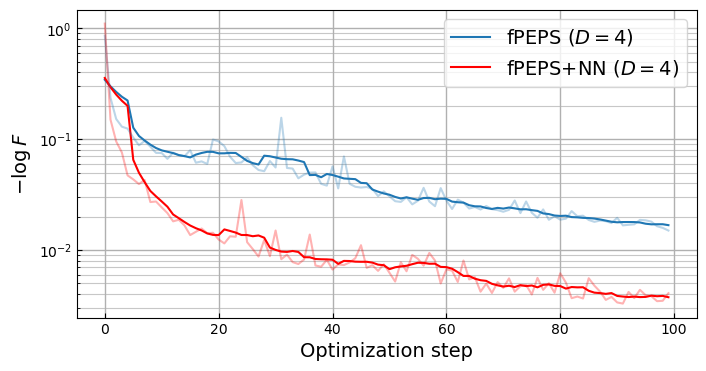

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter
import json
# read loss history from 'runs/exp3/exp3.json' and exp4.json, then plot them
pwd = '/home/sdu2/VMC/data'
fpeps_file = '/home/sdu2/VMC/data/SWO/target_fTN_D=8_chi=-1/fTN/D=4/chi=-1/state_fitting.json'
fpeps_nn_file = '/home/sdu2/VMC/data/SWO/target_fTN_D=8_chi=-1/fTN_backflow_attn_Tensorwise_v1/D=4/chi=-1/state_fitting.json'

with open(fpeps_file, 'r') as f:
    fpeps_data = json.load(f)
with open(fpeps_nn_file, 'r') as f:
    fpeps_nn_data = json.load(f)

fpeps_log = fpeps_data['-logf']
fpeps_nn_log = fpeps_nn_data['-logf']
fpeps_f = fpeps_data['fidelity']
fpeps_nn_f = fpeps_nn_data['fidelity']
fpeps_e = fpeps_data['mean']
fpeps_nn_e = fpeps_nn_data['mean']
fpeps_step = list(range(len(fpeps_log)))
fpeps_nn_step = list(range(len(fpeps_nn_log)))

fig, ax = plt.subplots(figsize=(8, 4))
# smooth the loss curve
def smooth_loss(loss, window_size=8):
    smoothed_loss = []
    for i in range(len(loss)):
        i_left = max(0, i - window_size//2)
        i_right = min(len(loss), i + window_size//2)
        smoothed_loss.append(sum(loss[i_left:i_right]) / (i_right - i_left))
    return smoothed_loss
smooth_loss_exp3 = smooth_loss(fpeps_log)
smooth_loss_exp4 = smooth_loss(fpeps_nn_log)
ax.plot(fpeps_step, smooth_loss_exp3, label=r'fPEPS $(D=4)$', color='tab:blue')
ax.plot(fpeps_nn_step, smooth_loss_exp4, label=r'fPEPS+NN $(D=4)$', color='red')

# original loss curve background
ax.plot(fpeps_step, fpeps_log, alpha=0.3, color='tab:blue')
ax.plot(fpeps_nn_step, fpeps_nn_log, alpha=0.3, color='red')
ax.set_yscale('log')
ax.set_xlabel('Optimization step', fontsize=14)
ax.set_ylabel(r'$-\log{F}$', fontsize=14)
ax.legend(fontsize=14)
# 4) draw major and minor grids
ax.grid(which='major', linestyle='-', linewidth=1)
ax.grid(which='minor', linestyle='-', linewidth=0.8, alpha=0.7)
# 5) set major and minor ticks to point inwards

ax.tick_params(axis='both', direction='in', which='both', labelsize=10)  # Inset plot
plt.savefig(pwd+'/SWO/draft_fitting_curve_Dt=8_logF.png', dpi=300, bbox_inches='tight')
plt.savefig(pwd+'/SWO/draft_fitting_curve_Dt=8_logF.pdf', dpi=300, bbox_inches='tight')
plt.show()


# Amplitude function evaluation time

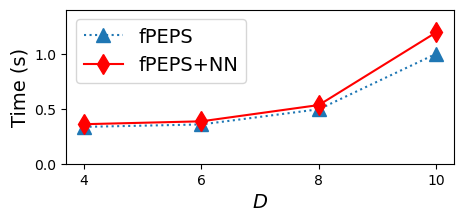

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

D_list = [4,6,8,10]
fpeps_time = [0.335069, 0.357155, 0.495140, 1.000046]
fpeps_time_std = [0.011542, 0.009335, 0.023797, 0.062386]
fpeps_nn_time = [0.359241, 0.385548, 0.533575, 1.194532]
fpeps_nn_time_std = [0.011264, 0.009668, 0.026059, 0.034493]

fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(
    D_list, 
    fpeps_time, 
    # yerr=fpeps_time_std, 
    label=r'fPEPS', 
    color='tab:blue', 
    marker='^', 
    markersize=10,
    # capsize=3,
    # capthick=1,
    linestyle=':',
    )
ax.plot(
    D_list, 
    fpeps_nn_time, 
    # yerr=fpeps_nn_time_std, 
    label=r'fPEPS+NN', 
    color='red', 
    marker='d', 
    markersize=10,
    # capsize=3,
    # capthick=1,
    linestyle='-',
    )
ax.set_xlabel(r'$D$', fontsize=14)
ax.set_ylabel(r'Time (s)', fontsize=14)
ax.legend(fontsize=14)
ax.set_ylim(0, 1.4)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticks(D_list)
plt.savefig(pwd+'/plots/draft_6x6_time_cost.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_28011/1639154977.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(os.path.join(outdir, 'draft_finite_range_nn_time_energy.png'),
/tmp/ipykernel_28011/1639154977.py:210: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(os.path.join(outdir, 'draft_finite_range_nn_time_energy.pdf'),
/home/sijingdu/TNVMC/VMC_code/mpsds/mpsds/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


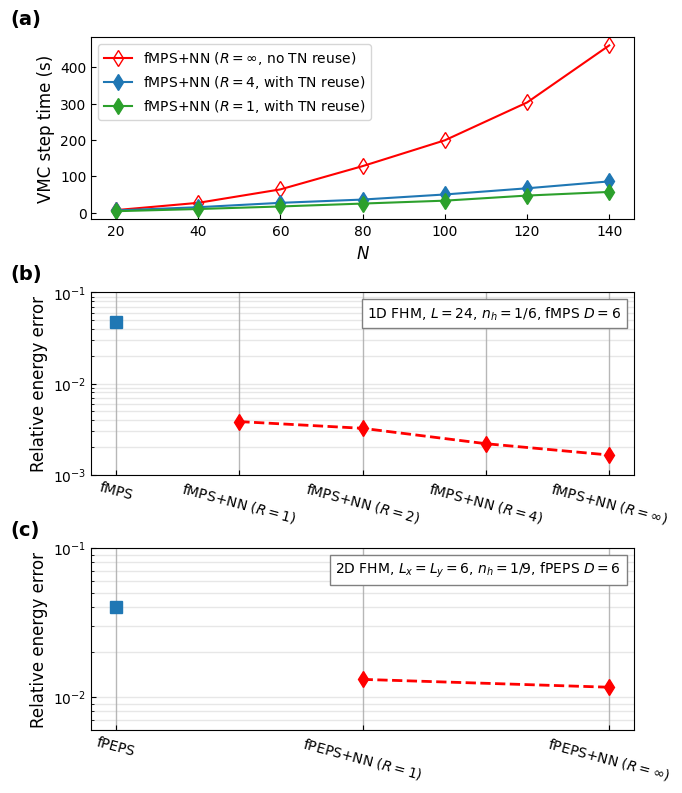

In [71]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# ── Data for (a) ──
# D_list = [4, 6, 8, 10]
# fpeps_time       = [0.335069, 0.357155, 0.495140, 1.000046]
# fpeps_nn_time    = [0.359241, 0.385548, 0.533575, 1.194532]
N_time_cost_fmps_nn_r1_reuse = {20:4, 40:10, 60:17, 80:25, 100:33, 120:47, 140:57}#, 160:70}
N_time_cost_fmps_nn_r1 = {20:6, 40:36, 60:80, 80:148, 100:236, 120:330, 140:500}
N_time_cost_fmps_nn_r4_reuse = {20:6, 40:15, 60:27, 80:36, 100:50,120:67,140:86}
N_time_cost_fmps_nn = {20:7, 40:27, 60:64, 80:128, 100:199, 120:303, 140:460}

# ── Data for (a) ──
r_energy_dict = {
    0: (-0.5361198518356441, 0.0002715456684679983),
    1: (-0.5609411436004996, 7.304638268954141e-05),
    2: (-0.5612778827065128, 5.868565137214372e-05),
    4: (-0.5618645613232692, 5.115433496854079e-05),
   -1: (-0.562171554284289, 3.707614076366411e-05),
}
L = 24
dmrg_energy = -13.51439141173990421 / L

r_list         = list(range(len(r_energy_dict)))
energy_list    = [e for e, _ in r_energy_dict.values()]
error_list     = [err for _, err in r_energy_dict.values()]
rel_error_list       = [abs(e - dmrg_energy)/abs(dmrg_energy) for e in energy_list]
rel_error_error_list = [abs(err)/abs(dmrg_energy)         for err in error_list]


# proxies for legend in (a)
line_proxy = mlines.Line2D([], [], color='black', linestyle='-')
band_proxy = mpatches.Patch(facecolor='gray', alpha=0.5)

# ── Data for (b) ──
r_energy_dict_2d = {
    0: (-0.63094, 0),
    1: (-0.6486792923385502, 0.000177994950836222),
   -1: (-0.6496633576611108, 0.0001645977153995073),
}
dmrg_energy_2d = -0.6573063
r_list_2d         = list(range(len(r_energy_dict_2d)))
energy_list_2d    = [e for e, _ in r_energy_dict_2d.values()]
error_list_2d     = [err for _, err in r_energy_dict_2d.values()]
rel_error_list_2d       = [abs(e - dmrg_energy_2d)/abs(dmrg_energy_2d) for e in energy_list_2d]
rel_error_error_list_2d = [abs(err)/abs(dmrg_energy_2d)         for err in error_list_2d]
# proxies for legend in (b)
line_proxy_2d = mlines.Line2D([], [], color='black', linestyle='-')
band_proxy_2d = mpatches.Patch(facecolor='gray', alpha=0.5)

# ── Make figure with 2 subplots ──
fig, (ax1, ax2, ax3) = plt.subplots(
    3, 1,
    figsize=(7, 9),
    gridspec_kw={'hspace': 0.4},  # <-- reduce this number to bring plots closer
    tight_layout=False            # turn off tight_layout so it doesn’t override hspace
)

# (a) Time cost scaling
ax1.plot(
    list(N_time_cost_fmps_nn.keys()),
    list(N_time_cost_fmps_nn.values()),
    label=r'fMPS+NN ($R=\infty$, no TN reuse)',
    color='red',
    marker='d',
    markersize=8,
    # capsize=3,
    # capthick=1,
    linestyle='-',
    # empty markers
    markerfacecolor='none',
)
ax1.plot(
    list(N_time_cost_fmps_nn_r4_reuse.keys()),
    list(N_time_cost_fmps_nn_r4_reuse.values()),
    label=r'fMPS+NN ($R=4$, with TN reuse)',
    color='tab:blue',
    marker='d',
    markersize=8,
    # capsize=3,
    # capthick=1,
    linestyle='-',
    # empty markers
    # markerfacecolor='none',
)

ax1.plot(
    list(N_time_cost_fmps_nn_r1_reuse.keys()), 
    list(N_time_cost_fmps_nn_r1_reuse.values()), 
    label=r'fMPS+NN ($R=1$, with TN reuse)', 
    color='tab:green', 
    marker='d', 
    markersize=8,
    # capsize=3,
    # capthick=1,
    linestyle='-',
)

ax1.set_xlabel(r'$N$', fontsize=12)
ax1.set_ylabel(r'VMC step time (s)', fontsize=12)
ax1.set_xticks(list(N_time_cost_fmps_nn.keys()))
# ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.legend(fontsize=10)
ax1.tick_params(axis='both', direction='in', labelsize=10)
ax1.text(-0.15, 1.07, '(a)', transform=ax1.transAxes,
         fontsize=14, fontweight='bold')

# (a) Relative error vs range r
# 1) finite‐r series
ax2.plot(
    r_list[1:], rel_error_list[1:],
    color='red', marker='d', ms=8, ls='--', lw=2,
    label='_nolegend_'
)
# 2) the r=0 (or “∞”) point in black
ax2.plot(
    r_list[0], rel_error_list[0],
    's', color='tab:blue', ms=8, zorder=10, label='_nolegend_'
)
# grids
ax2.grid(axis='y', which='both', lw=1, alpha=0.3)
ax2.grid(axis='x', which='major', lw=1, alpha=0.9)

ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels([
    r'fMPS',
    r'fMPS+NN $(R=1)$',
    r'fMPS+NN $(R=2)$',
    r'fMPS+NN $(R=4)$',
    r'fMPS+NN $(R=\infty)$'
], rotation=-15, ha='center')
ax2.set_ylabel('Relative energy error', fontsize=12)
ax2.set_yscale('log')
ax2.set_ylim(1e-3, 1e-1)
ax2.tick_params(axis='both', which='both', direction='in', labelsize=10)
ax2.text(-0.15, 1.07, '(b)', transform=ax2.transAxes,
         fontsize=14, fontweight='bold')

# 1) finite‐r series
ax3.plot(
    r_list_2d[1:], rel_error_list_2d[1:],
    color='red', marker='d', ms=8, ls='--', lw=2,
    label='_nolegend_'
)
# 2) the r=0 (or “∞”) point in black
ax3.plot(
    r_list_2d[0], rel_error_list_2d[0],
    's', color='tab:blue', ms=8, zorder=10, label='_nolegend_'
)


ax3.grid(axis='y', which='both', lw=1, alpha=0.3)
ax3.grid(axis='x', which='major', lw=1, alpha=0.9)
ax3.text(-0.15, 1.07, '(c)', transform=ax3.transAxes,
         fontsize=14, fontweight='bold')
ax3.set_xticks([0, 1, 2,])
ax3.set_xticklabels([
    r'fPEPS',
    r'fPEPS+NN $(R=1)$',
    r'fPEPS+NN $(R=\infty)$'
], rotation=-15, ha='center')
ax3.set_ylabel('Relative energy error', fontsize=12)
ax3.set_yscale('log')
ax3.set_ylim(6e-3, 1e-1)
ax3.tick_params(axis='both', which='both', direction='in', labelsize=10)

from matplotlib.lines import Line2D
from matplotlib.offsetbox import AnchoredText

# Your custom info (you can include newlines)
info_time = r'$L_x=L_y=6$ square lattice fPEPS'
info_1d = r'1D FHM, $L=24$, $n_h=1/6$, fMPS $D=6$'
info_2d = r'2D FHM, $L_x=L_y=6$, $n_h=1/9$, fPEPS $D=6$'

# Put it in a legend with handlelength=0 so no line is drawn
at = AnchoredText(
    info_time,
    loc='upper center',
    prop=dict(size=10),
    frameon=True,
)
at.patch.set_edgecolor('gray')
# ax1.add_artist(at)
at = AnchoredText(
    info_1d,
    loc='upper right',
    prop=dict(size=10),
    frameon=True,
)
at.patch.set_edgecolor('gray')
ax2.add_artist(at)
at = AnchoredText(
    info_2d,
    loc='upper right',
    prop=dict(size=10),
    frameon=True,
)
at.patch.set_edgecolor('gray')
ax3.add_artist(at)

# Save & show
pwd ='/home/sijingdu/TNVMC/VMC_code/vmc_torch/data/'
outdir = os.path.join(pwd, 'plots')
os.makedirs(outdir, exist_ok=True)
fig.savefig(os.path.join(outdir, 'draft_finite_range_nn_time_energy.png'),
            dpi=300, bbox_inches='tight')
fig.savefig(os.path.join(outdir, 'draft_finite_range_nn_time_energy.pdf'),
            dpi=300, bbox_inches='tight')
plt.show()


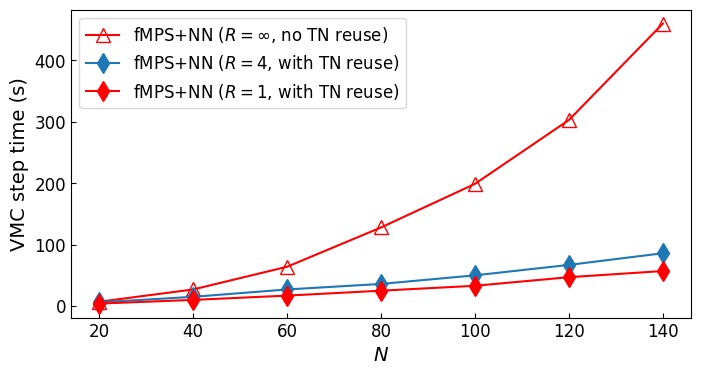

In [65]:
# plot the time cost
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# N_time_cost_fmps_nn_r1_reuse = {16: 3, 24: 5, 48: 11, 64:15, 96:28, 100: 29, 128:39, 156:51}
# N_time_cost_fmps_nn_r1 = {16: 5, 24: 13, 48: 52, 64:85, 96:182, 100:205, 128:325, 156:540}
N_time_cost_fmps_nn_r1_reuse = {20:4, 40:10, 60:17, 80:25, 100:33, 120:47, 140:57}#, 160:70}
N_time_cost_fmps_nn_r2_reuse = {20:4, 40:11, 60:19, 80:26, 100:37,120:49,140:63}
N_time_cost_fmps_nn_r4_reuse = {20:6, 40:15, 60:27, 80:36, 100:50,120:67,140:86}
N_time_cost_fmps_nn_r1 = {20:6, 40:36, 60:80, 80:148, 100:236, 120:330, 140:500}
N_time_cost_fmps_nn = {20:7, 40:27, 60:64, 80:128, 100:199, 120:303, 140:460}

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    list(N_time_cost_fmps_nn.keys()),
    list(N_time_cost_fmps_nn.values()),
    label=r'fMPS+NN ($R=\infty$, no TN reuse)',
    color='red',
    marker='^',
    markersize=10,
    # capsize=3,
    # capthick=1,
    linestyle='-',
    # empty markers
    markerfacecolor='none',
)

# ax.plot(
#     list(N_time_cost_fmps_nn_r1.keys()), 
#     list(N_time_cost_fmps_nn_r1.values()), 
#     label=r'fMPS+NN ($R=1$, no reuse)', 
#     color='tab:blue', 
#     marker='^', 
#     markersize=10,
#     # capsize=3,
#     # capthick=1,
#     linestyle='-',
# )
ax.plot(
    list(N_time_cost_fmps_nn_r4_reuse.keys()),
    list(N_time_cost_fmps_nn_r4_reuse.values()),
    label=r'fMPS+NN ($R=4$, with TN reuse)',
    color='tab:blue',
    marker='d',
    markersize=10,
    # capsize=3,
    # capthick=1,
    linestyle='-',
    # empty markers
    # markerfacecolor='none',
)

ax.plot(
    list(N_time_cost_fmps_nn_r1_reuse.keys()), 
    list(N_time_cost_fmps_nn_r1_reuse.values()), 
    label=r'fMPS+NN ($R=1$, with TN reuse)', 
    color='red', 
    marker='d', 
    markersize=10,
    # capsize=3,
    # capthick=1,
    linestyle='-',
)


ax.set_xlabel(r'$N$', fontsize=14)
ax.set_ylabel(r'VMC step time (s)', fontsize=14)
# ax.legend(fontsize=14)
for axx in fig.get_axes():
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
    axx.tick_params(axis='both', direction='in', labelsize=12, which='both') 
    axx.legend(fontsize=12)
# ax.set_xticks([50, 100, 150, 200])


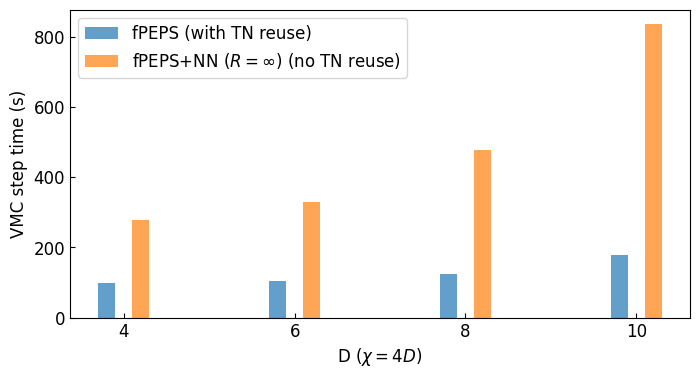

In [54]:
import matplotlib.pyplot as plt

# The following times are obtained using torch native SVD and QR forward/backward functions.

L_6_fpeps_time_cost_dict = {4: 98, 6: 104, 8: 123, 10: 177}
L_6_fpeps_no_reuse_time_cost_dict = {4: 285, 6: 329, 8: 445, 10:820}
L_6_fpepsnn_time_cost_dict = {4: 277, 6: 330, 8:476, 10:835} # MKL threads = 1, 1 CPU core
L_6_fpepsnnr1_time_cost_dict = {4: 280, 6: 330, 8:438, 10:665} # MKL threads = 1, 1 CPU core
L_6_fpepsnn_exact_time_cost_dict = {4: 135, 6: 152, 8:210, 10:425} # MKL threads = 1, 1 CPU core

L_6_fpepsnnr1_time_cost_dict_24cpu = {4: 165, 6: 229, 8:367, 10:642} # MKL threads = 24, 24 CPU cores
L_6_fpepsnnr1_time_cost_vs_mkl_dict = {1: 2150, 8: 950, 16:750, 24:642} # MKL threads vs time cost
L_6_fpepsnn_time_cost_vs_mkl_dict = {1: 1560, 8: 1552, 16:1370, 24:1310} # MKL threads vs time cost

# use a histogram to show the time cost comparison
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
width = 0.2
ax.bar([x - width for x in list(L_6_fpeps_time_cost_dict.keys())], list(L_6_fpeps_time_cost_dict.values()), width=0.2, label=r'fPEPS (with TN reuse)', alpha=0.7)

# ax.bar([10-0.2], [642], width=0.2, label=r'fPEPS+NN ($r=1$) (w reuse, 24 CPU cores)', color='tab:purple', alpha=0.7)

# ax.bar([x - width for x in list(L_6_fpeps_no_reuse_time_cost_dict.keys())], list(L_6_fpeps_no_reuse_time_cost_dict.values()), width=0.2, label=r'fPEPS (w/o reuse)', alpha=0.7)

# ax.bar([x for x in list(L_6_fpeps_time_cost_dict.keys())], list(L_6_fpepsnnr1_time_cost_dict.values()), width=0.2, label=r'fPEPS+NN ($r=1$) (w reuse)', alpha=0.7)
ax.bar([x + width for x in list(L_6_fpeps_time_cost_dict.keys())], list(L_6_fpepsnn_time_cost_dict.values()), width=0.2, label=r'fPEPS+NN ($R=\infty$) (no TN reuse)', alpha=0.7)
# ax.bar([x +2*width for x in list(L_6_fpepsnn_exact_time_cost_dict.keys())], list(L_6_fpepsnn_exact_time_cost_dict.values()), width=0.2, label=r'fPEPS+NN ($r=\infty$) (w/o reuse, exact contraction)', color='green', alpha=0.7)


ax.set_xticks([x for x in list(L_6_fpeps_time_cost_dict.keys())])
ax.set_yticks([0, 200, 400, 600, 800])
ax.set_xlabel(r'D ($\chi=4D$)', fontsize=12)
ax.set_ylabel('VMC step time (s)', fontsize=12)
# ax.set_title(r'VMC sampling time (1 CPU core, 20 configs): $6\times 6$ square lattice', fontsize=12)
# ax.legend(fontsize=12)
for axx in fig.get_axes():
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
    axx.tick_params(axis='both', direction='in', labelsize=12, which='both') 
    axx.legend(fontsize=12)

pwd = '/home/sijingdu/TNVMC/VMC_code/vmc_torch/data/'
plt.savefig(pwd+f'/plots/draft_VMC_sampling_time_cost_comparison_2D.png', dpi=300, bbox_inches='tight')
plt.savefig(pwd+f'/plots/draft_VMC_sampling_time_cost_comparison_2D.pdf', dpi=300, bbox_inches='tight')

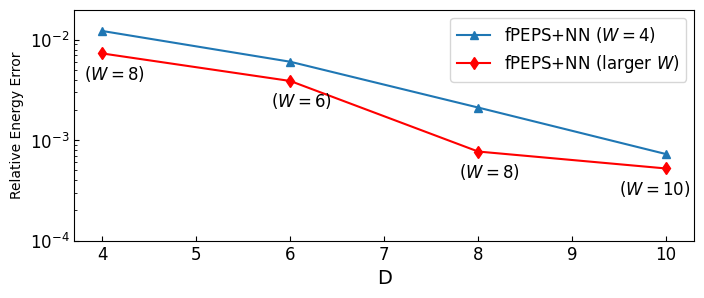

In [57]:
narrow_nn_energy_dict = {4: -0.6248765630268845, 6: -0.6287942084563479, 8: -0.6312810323674181, 10: -0.6321588203768584}
wider_nn_energy_dict = {4: -0.6279940619285701, 6: -0.6301587880412602, 8: -0.6321312175244568, 10: -0.6322882889961238}
dmrg_energy = -0.6326190

narrow_nn_rel_error_list = [abs(e - dmrg_energy)/abs(dmrg_energy) for e in narrow_nn_energy_dict.values()]
wider_nn_rel_error_list = [abs(e - dmrg_energy)/abs(dmrg_energy) for e in wider_nn_energy_dict.values()]

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(
    list(narrow_nn_energy_dict.keys()), 
    narrow_nn_rel_error_list, 
    label=r'fPEPS+NN $(W=4)$', 
    color='tab:blue', 
    marker='^', 
    markersize=6,
    linestyle='-',
)
ax.plot(
    list(wider_nn_energy_dict.keys()), 
    wider_nn_rel_error_list, 
    label=r'fPEPS+NN (larger $W$)', 
    color='red', 
    marker='d', 
    markersize=6,
    linestyle='-',
)

ax.text(4-0.2, wider_nn_rel_error_list[0]/1.8, r'$(W=8)$', fontsize=12)
ax.text(6-0.2, wider_nn_rel_error_list[1]/1.8, r'$(W=6)$', fontsize=12)
ax.text(8-0.2, wider_nn_rel_error_list[2]/1.8, r'$(W=8)$', fontsize=12)
ax.text(10-0.5, wider_nn_rel_error_list[3]/1.8, r'$(W=10)$', fontsize=12)

ax.set_xlabel(r'D', fontsize=14)
ax.set_ylabel(r'Relative Energy Error', fontsize=10)
ax.set_yscale('log')
ax.set_ylim(1e-4, 2e-2)
for axx in fig.get_axes():
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
    axx.tick_params(axis='both', direction='in', labelsize=12, which='both') 
    axx.legend(fontsize=12)

pwd = '/home/sijingdu/TNVMC/VMC_code/vmc_torch/data/'
plt.savefig(pwd+f'/plots/draft_fpepsnn_energy_error_vs_W.png', dpi=300, bbox_inches='tight')
plt.savefig(pwd+f'/plots/draft_fpepsnn_energy_error_vs_W.pdf', dpi=300, bbox_inches='tight')

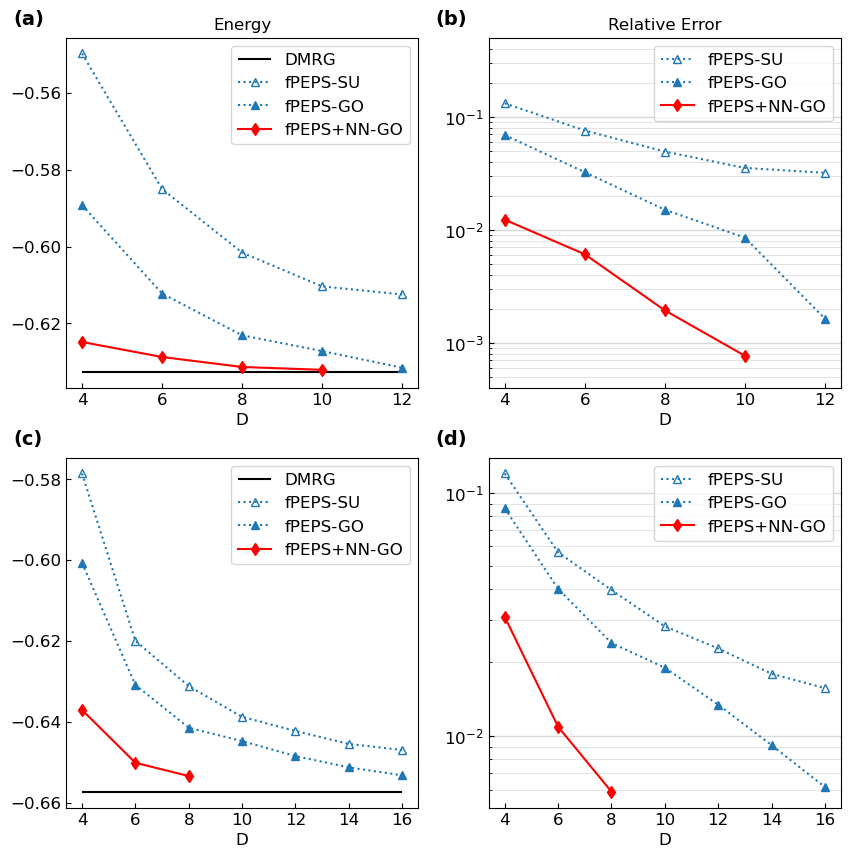

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

L_6_fpeps_su_dict = {4:-0.5786, 6:-0.6200, 8:-0.6312, 10:-0.6388, 12:-0.6423, 14: -0.6455, 16:-0.6470}
L_6_fpeps_go_wy_dict = {4:-0.6007, 6:-0.6309, 8:-0.6415, 10:-0.6448, 12:-0.6485, 14:-0.6513, 16: -0.65327}
L_6_fpeps_go_wy_err_dict = {4:0.00007, 6:0.00006, 8:0.00002, 10:0.00002, 12:0.00002}
L_6_fpeps_nn_dict = {4:-0.6370741515003614, 6:-0.6501584908089413, 8:-0.65344035143394}
L_6_fpeps_nn_err_dict = {4:0.0002287410365406822, 6:0.00014701405733135911, 8:0.00014887104046273678}
L_6_dmrg_energy = -0.6573063

L_4_fpeps_su_dict = {4:-0.5497, 6:-0.5850, 8:-0.6016, 10:-0.6104, 12:-0.6125}#, 14:-0.6154, 16:-0.6152}
L_4_fpeps_go_wy_dict = {4:-0.5892, 6:-0.61225, 8:-0.62314, 10:-0.62725, 12:-0.63159}
L_4_fpeps_go_sj_dict = {4:-0.6027,5:-0.6166, 6:-0.6166, 8:-0.6290}
L_4_fpeps_nn_dict = {4:-0.6248765630268845, 6:-0.6287942084563479, 8:-0.6313989738581698, 10:-0.6321355870753567}
L_4_fpeps_nn_err_dict = {4:0.0002545110324327223, 6:0.00015610935418274748, 8:0.00016363569030096632, 10:8.040792799042508e-05}
L_4_dmrg_energy = -0.6326190



fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Third subplot
ax[1, 0].hlines([L_6_dmrg_energy], xmin=4, xmax=max(L_6_fpeps_go_wy_dict.keys()), color='black', label="DMRG", linestyles='-')
ax[1, 0].plot(list(L_6_fpeps_su_dict.keys()), list(L_6_fpeps_su_dict.values()), 
marker='^', label='fPEPS-SU',markerfacecolor='none', color='tab:blue', markersize=6, linestyle=':')
ax[1, 0].plot(list(L_6_fpeps_go_wy_dict.keys()), list(L_6_fpeps_go_wy_dict.values()), 
marker='^', label='fPEPS-GO', color='tab:blue', markersize=6, linestyle=':')
ax[1, 0].plot(list(L_6_fpeps_nn_dict.keys()), list(L_6_fpeps_nn_dict.values()),# yerr=list(L_6_fpeps_nn_err_dict.values()), 
marker='d', label='fPEPS+NN-GO', color='red', markersize=6, linestyle='-')
ax[1, 0].set_xlabel('D', fontsize=12)
# ax[1, 0].set_ylabel('Energy')
# ax[1, 0].grid(True)
ax[1, 0].yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
ax[1, 0].text(-0.15, 1.08, '(c)', transform=ax[1, 0].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')

# First subplot
ax[0, 0].hlines([L_4_dmrg_energy], xmin=4, xmax=12, color='black', label="DMRG", linestyle='-')
ax[0, 0].plot(list(L_4_fpeps_su_dict.keys()), list(L_4_fpeps_su_dict.values()), 
marker='^', label='fPEPS-SU',markerfacecolor='none', color='tab:blue', markersize=6, linestyle=':')
ax[0, 0].plot(list(L_4_fpeps_go_wy_dict.keys()), list(L_4_fpeps_go_wy_dict.values()), 
marker='^', label='fPEPS-GO', color='tab:blue', markersize=6, linestyle=':')
ax[0, 0].plot(list(L_4_fpeps_nn_dict.keys()), list(L_4_fpeps_nn_dict.values()),# yerr=list(L_4_fpeps_nn_err_dict.values()), 
marker='d', label='fPEPS+NN-GO', color='red', markersize=6, linestyle='-')
ax[0, 0].set_xlabel('D', fontsize=12)
# ax[0, 0].grid(True)
ax[0, 0].set_title('Energy')
ax[0, 0].legend(fontsize=12)
ax[0, 0].yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
ax[0, 0].text(-0.15, 1.08, '(a)', transform=ax[0, 0].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')

# Fourth subplot
ax[1, 1].plot(list(L_6_fpeps_su_dict.keys()), [abs(value - L_6_dmrg_energy) / abs(L_6_dmrg_energy) for value in L_6_fpeps_su_dict.values()], 
marker='^', label='fPEPS-SU',markerfacecolor='none', color='tab:blue', markersize=6, linestyle=':')
ax[1, 1].plot(list(L_6_fpeps_go_wy_dict.keys()), [abs(value - L_6_dmrg_energy) / abs(L_6_dmrg_energy) for value in L_6_fpeps_go_wy_dict.values()], 
marker='^', label='fPEPS-GO', color='tab:blue', markersize=6, linestyle=':')
ax[1, 1].plot(list(L_6_fpeps_nn_dict.keys()), [abs(value - L_6_dmrg_energy) / abs(L_6_dmrg_energy) for value in L_6_fpeps_nn_dict.values()],# yerr=[err / abs(L_6_dmrg_energy) for err in L_6_fpeps_nn_err_dict.values()], 
marker='d', label='fPEPS+NN-GO', color='red', markersize=6, linestyle='-')
ax[1, 1].set_xlabel('D', fontsize=12)
ax[1, 1].set_yscale('log')
# ax[1, 1].grid(True)
ax[1, 1].text(-0.15, 1.08, '(d)', transform=ax[1, 1].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')

# Second subplot
ax[0, 1].plot(list(L_4_fpeps_su_dict.keys()), [abs(value - L_4_dmrg_energy) / abs(L_4_dmrg_energy) for value in L_4_fpeps_su_dict.values()], 
marker='^', label='fPEPS-SU',markerfacecolor='none', color='tab:blue', markersize=6, linestyle=':')
ax[0, 1].plot(list(L_4_fpeps_go_wy_dict.keys()), [abs(value - L_4_dmrg_energy) / abs(L_4_dmrg_energy) for value in L_4_fpeps_go_wy_dict.values()], 
marker='^', label='fPEPS-GO', color='tab:blue', markersize=6, linestyle=':')
ax[0, 1].plot(list(L_4_fpeps_nn_dict.keys()), [abs(value - L_4_dmrg_energy) / abs(L_4_dmrg_energy) for value in L_4_fpeps_nn_dict.values()],# yerr=[err / abs(L_4_dmrg_energy) for err in L_4_fpeps_nn_err_dict.values()], 
marker='d', label='fPEPS+NN-GO', color='red', markersize=6, linestyle='-')
ax[0, 1].set_xlabel('D', fontsize=12)
ax[0, 1].set_yscale('log')
# ax[0, 1].grid(True)
ax[0, 1].set_title('Relative Error')
ax[0, 1].text(-0.15, 1.08, '(b)', transform=ax[0, 1].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')

for axx in fig.get_axes():
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
    axx.tick_params(axis='both', direction='in', labelsize=12, which='both') 
    axx.legend(fontsize=12)

ax[0, 1].grid(which='major', axis='y', linewidth=1, alpha=0.5)
ax[0, 1].grid(which='minor', axis='y', linewidth=0.5, alpha=0.5)
ax[1, 1].grid(which='major', axis='y', linewidth=1, alpha=0.5)
ax[1, 1].grid(which='minor', axis='y', linewidth=0.5, alpha=0.5)
ax[0, 1].set_ylim(4e-4, 5e-1)

# ax[0, 0].set_ylim(-0.65, -0.55)
# ax[1, 0].set_ylim(-0.67, -0.58)

# Save the plot
plt.savefig(f'./data/plots/draft_energy_comparison_2.png', dpi=300, bbox_inches='tight')
plt.savefig(f'./data/plots/draft_energy_comparison_2.pdf', dpi=300, bbox_inches='tight')
